# Computing volume fractions by intersecting unstructured meshes

**Code used to generate the data**: 

**Article DOI**: 

**Research data archive**:

## Surface-Mesh / Cell Intersection Algorithm

**TODO**: Short description


## Sphere Initialization

In [76]:
# Pick up .csv files 
import os
import pandas as pd
from math import pi
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from math import ceil

rcParams["text.usetex"] = True
rcParams["figure.dpi"] = 300 
rcParams["font.size"] = 8
def plot_study(surface, mesher, exact_volume=1, data_dir="", 
               alg_name="",csv_file="surfaceCellVofInit.csv"):
    
    param_dirs = [param_dir for param_dir in os.listdir(os.curdir) if os.path.isdir(param_dir) \
                   and surface in param_dir and mesher in param_dir] 
    param_dirs.sort()

    csv_files = [os.path.join(param_dir,csv_file) for param_dir in param_dirs \
                 if os.path.exists(os.path.join(param_dir,csv_file))]
    
    if (len(csv_files) == 0):
        raise ValueError("No CSV files found, did the parameter variation run?")

    data = pd.concat((pd.read_csv(csv_file) for csv_file in csv_files))

    n_cells = list(set(data["N_CELLS"]))
    n_triangles = list(set(data["N_TRIANGLES"]))
    
    data["N_TRIANGLES_ROOT"] = data["N_TRIANGLES"] ** 0.5
    data["N_C"] = np.ceil(data["N_CELLS"]**(1./3.))
    data["VOLUME_ERROR_FROM_EXACT_VOLUME"] = (data["VOLUME_FROM_VOLUME_FRACTION"] - exact_volume).abs() / exact_volume
    data["CPU_TIME_SECONDS"] = data["CPU_TIME_MICROSECONDS"] / 1e06 
    
    data.to_csv(os.path.join(data_dir,"%s-%s-volume-fraction-initialization.csv" % (alg_name,surface)))
    data.to_latex(os.path.join(data_dir, "%s-%s-volume-fraction-initialization.tex" % (alg_name,surface)))
    
    # Plot convergence
    fig_conv, ax_conv = plt.subplots()
    for n_cell in n_cells:
        n_c = ceil(n_cell**(1./3.))
        n_cell_data = data[data["N_CELLS"] == n_cell] 
        ax_conv.plot(n_cell_data["N_TRIANGLES_ROOT"], 
                     n_cell_data["VOLUME_ERROR_FROM_EXACT_VOLUME"], 
                     label = r"$N_c$ = %d" % n_c, marker='x')

    ax_conv.set_title("Volume fraction errors: %s" % surface)
    ax_conv.set_ylabel(r"$E_v$")
    ax_conv.set_xlabel(r"$\sqrt{N_T}$")
    ax_conv.loglog()
    fig_conv.legend(bbox_to_anchor=[0.95,0.95],loc="upper right")
    # Save the figure.
    fig_conv.set_size_inches(3,2)
    #fig_conv.tight_layout()
    fig_conv.savefig(os.path.join(data_dir, "%s-%s-surface-volume-errors.pdf" % (alg_name,surface)),
                     bbox_inches='tight')
    
    # Plot CPU times
    fig_cpu, ax_cpu = plt.subplots()
    for n_cell in n_cells:
        n_c = ceil(n_cell**(1./3.))
        n_cell_data = data[data["N_CELLS"] == n_cell] 
        ax_cpu.plot(n_cell_data["N_TRIANGLES_ROOT"], 
                    n_cell_data["CPU_TIME_SECONDS"], 
                    label = r"$N_c$ = %d" % n_c, marker='x')
    ax_cpu.set_title("CPU times: %s" % surface)
    ax_cpu.set_ylabel(r"CPU time in seconds")
    ax_cpu.set_xlabel(r"$\sqrt{N_T}$")
    fig_cpu.legend(bbox_to_anchor=[0.25,0.85],loc="upper left")
    # Save the figure.
    fig_cpu.set_size_inches(3,2)
    #fig_cpu.tight_layout()
    fig_cpu.savefig(os.path.join(data_dir, "%s-%s-surface-vof-init-cpu-times.pdf" % (alg_name,surface)),
                    bbox_inches='tight')

In [77]:
import warnings 
# Set the GEOM_VOF_INIT environmental variable to the folder where you want the data to be saved. 
data_dir = os.curdir
try:
    data_dir = os.environ["GEOM_VOF_INIT"] 
except:
    warnings.warn("No GEOM_VOF_INIT environmental variable set, storing data in the current working directory.") 

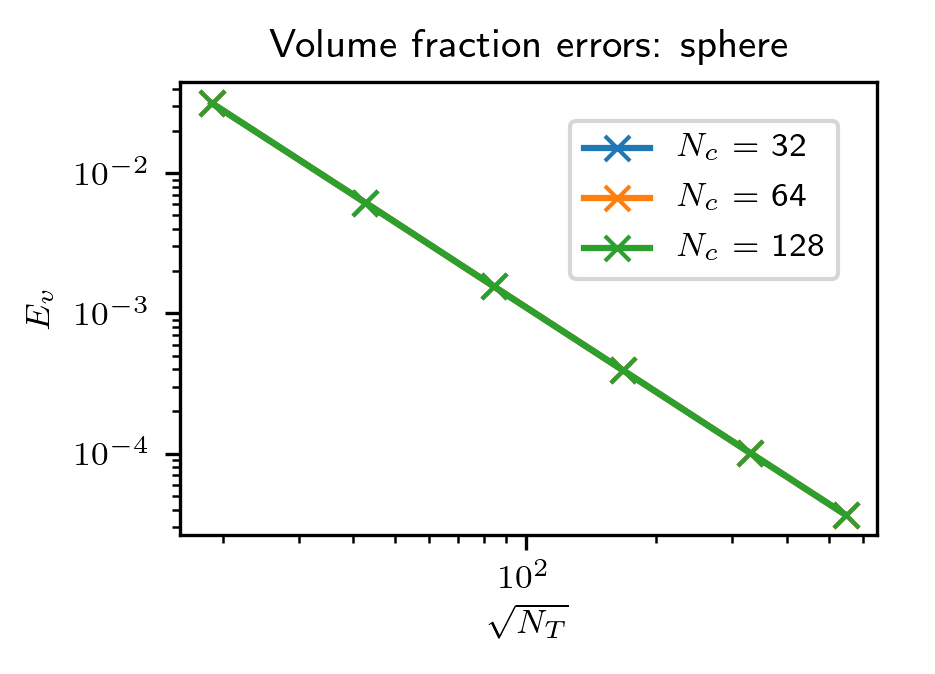

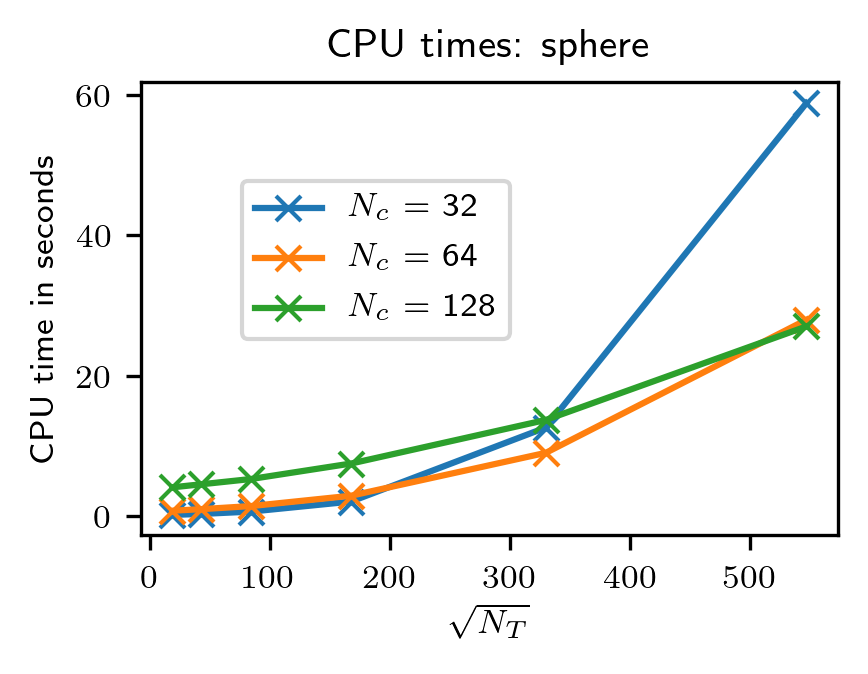

In [78]:
# Exact volume of the sphere.  
sphere_radius = 0.15 # WARNING: Adapt this if another radius is chosen for the sphere in the study. 
sphere_volume = sphere_radius** 3 * 4 * pi / 3.

plot_study("sphere", "blockMesh", alg_name="SMCI", exact_volume=sphere_volume, data_dir=data_dir)